# The goal of this project is to use the available data to create a next-day prediction model for whether or not it will rain. Such a model could be utilized in a weather app for the benefit of the public at large.
---

In [94]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')

In [95]:
data = pd.read_csv('weatherAustralia.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [96]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [98]:
data.shape

(145460, 23)

## Start EDA
---

#### EDA between RainTomorrow and the continious variables


In [99]:
# Check Null columns
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [100]:
# There are a lot of NAN values which we can drop
data.dropna(inplace=True)

In [101]:
data.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [102]:
data.shape

(56420, 23)

In [103]:
# Lets try to plot scatter curve between the numerical varaibles
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


<Axes: xlabel='RainToday,RainTomorrow'>

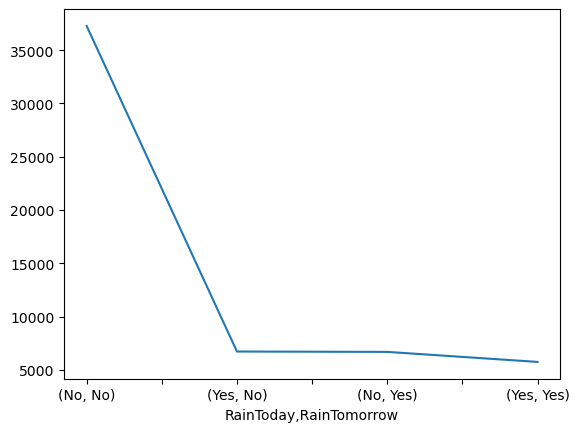

In [104]:
# RainToday and RainTomorrow

data[['RainToday','RainTomorrow']].value_counts().plot.line()


<Axes: xlabel='RainTomorrow'>

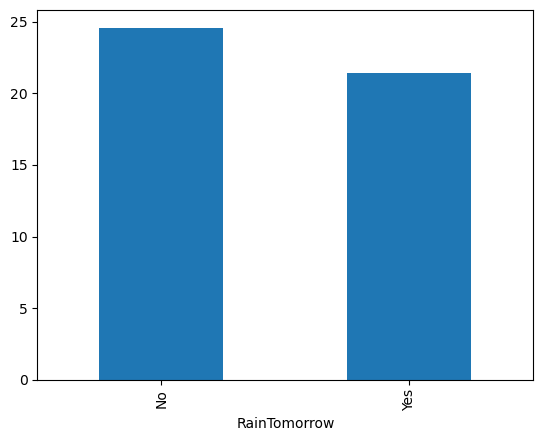

In [105]:
# RainTomorrow and MaxTemp

data.groupby(by=['RainTomorrow']).MaxTemp.median().plot.bar()


#### So we see a trend that if the MAX Temp is higher then the next day rain chances are less.

<Axes: xlabel='RainTomorrow'>

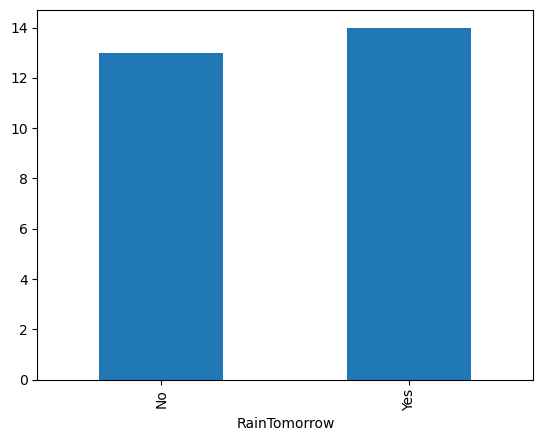

In [106]:
# RainTomorrow and MinTemp 
data.groupby(by=['RainTomorrow']).MinTemp.median().plot.bar()


### If Min temp is higher the rain tomorrow chances are higher

### Rainfall and RainTomorrow
---
#### Since Rainfall is a continious variable with a huge range we can create a new columns as Rainfall_Category and assign a category for each resocrd. We create 5 categories where rach represrns a block of percentile data
      - Cat 1 = 0-25 pctl
      - Cat 2 = 25-50 pctl
      - Cat 3 = 50-75 pctl
      - Cat 4 = 75-100 pctl

In [107]:
np.array(data.Rainfall.quantile([.75,.8,.85,.9,.95,1]))
def groupRainFall(x):
    if x<=.6:
        return '0-0.6'
    if x<=1.6:
       return '0.6-1.6' 
    if x<=3:
        return '1.6-3'
    if x<=5.8:
       return '3-5.8' 
    if x<=12.2:
       return '5.8-12' 
    else:
        return '12+'
data['Rainfall_group'] = data.Rainfall.apply(groupRainFall)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            56420 non-null  object 
 1   Location        56420 non-null  object 
 2   MinTemp         56420 non-null  float64
 3   MaxTemp         56420 non-null  float64
 4   Rainfall        56420 non-null  float64
 5   Evaporation     56420 non-null  float64
 6   Sunshine        56420 non-null  float64
 7   WindGustDir     56420 non-null  object 
 8   WindGustSpeed   56420 non-null  float64
 9   WindDir9am      56420 non-null  object 
 10  WindDir3pm      56420 non-null  object 
 11  WindSpeed9am    56420 non-null  float64
 12  WindSpeed3pm    56420 non-null  float64
 13  Humidity9am     56420 non-null  float64
 14  Humidity3pm     56420 non-null  float64
 15  Pressure9am     56420 non-null  float64
 16  Pressure3pm     56420 non-null  float64
 17  Cloud9am        56420 non-null  

<Axes: xlabel='Rainfall', ylabel='RainTomorrow'>

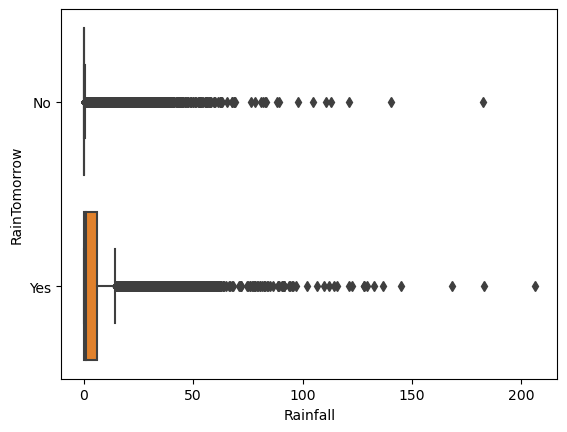

In [108]:
sns.boxplot(data=data,x='Rainfall',y='RainTomorrow')


In [109]:
data.Rainfall_group.value_counts()

Rainfall_group
0-0.6      42423
0.6-1.6     3183
12+         2798
3-5.8       2731
5.8-12      2720
1.6-3       2565
Name: count, dtype: int64

In [110]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Rainfall_group'],
      dtype='object')

<Axes: xlabel='RainTomorrow,Rainfall_group'>

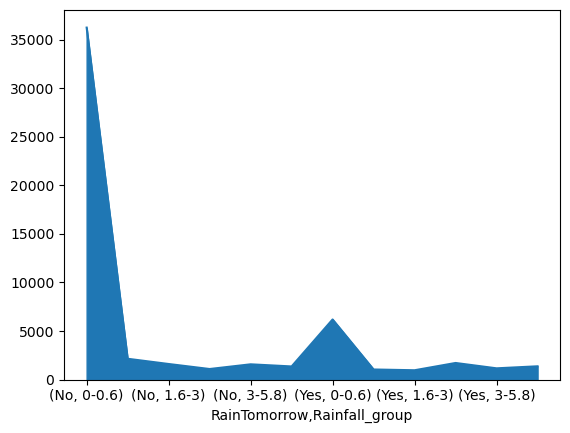

In [111]:
data.groupby(by=['RainTomorrow','Rainfall_group'])['Rainfall_group'].count().plot.area()

### The trend shows that in general a small patch of rain between upto .6 mm can cause a rain tomorrow.

<Axes: xlabel='RainTomorrow', ylabel='MaxTemp'>

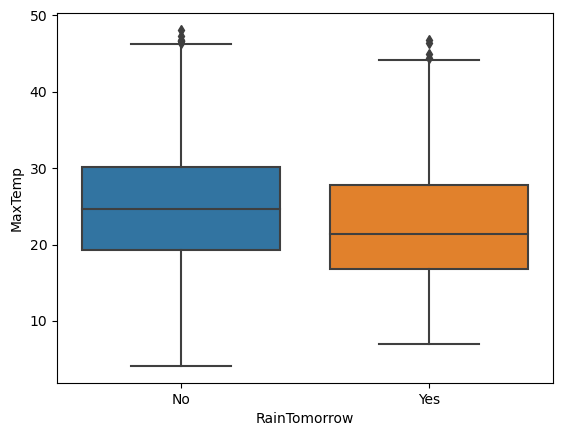

In [112]:
sns.boxplot(data=data,x='RainTomorrow',y='MaxTemp')

<Axes: xlabel='RainTomorrow', ylabel='MinTemp'>

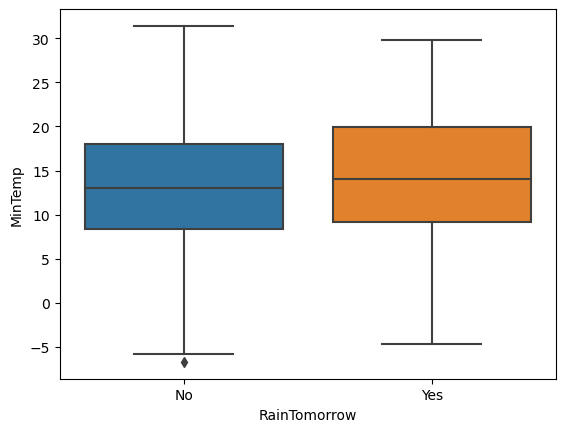

In [113]:
sns.boxplot(data=data,x='RainTomorrow',y='MinTemp')

#### The trend shows that number of days of RainTomorrow = Yes is higher if the day's Min temp is higher

<Axes: xlabel='RainToday', ylabel='RainTomorrow'>

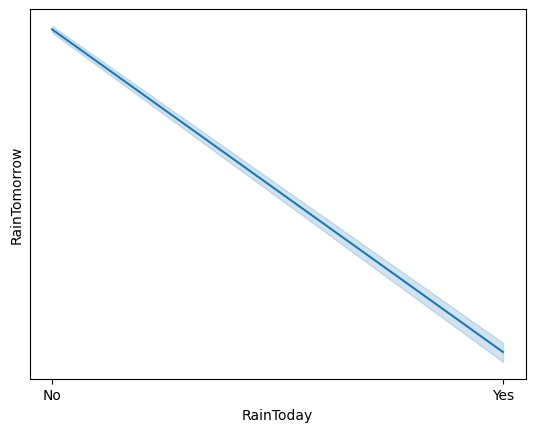

In [114]:
sns.lineplot(data=data,x='RainToday',y='RainTomorrow')

<Axes: xlabel='Sunshine', ylabel='RainTomorrow'>

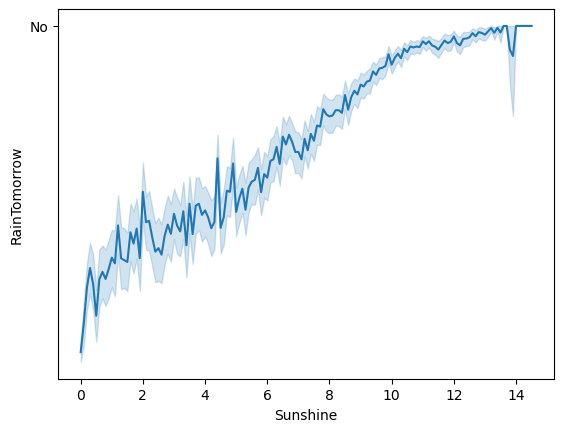

In [115]:
# Lets check the relation with Sun shine and Rain Tomorrow

sns.lineplot(data=data,x='Sunshine',y='RainTomorrow')

# With higher sunshine chances of rain tomorrow increases

<Axes: xlabel='Evaporation', ylabel='RainTomorrow'>

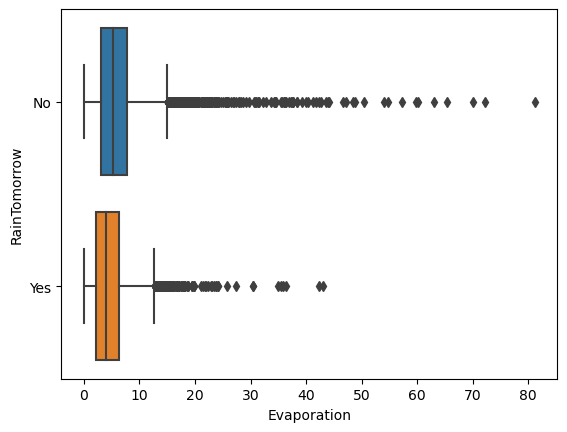

In [116]:
# Lets check the relationship between Evaporation and Rain Tomorrow

sns.boxplot(data=data,x='Evaporation',y='RainTomorrow')

# No significant trend can be observed here

<Axes: xlabel='Cloud3pm', ylabel='RainTomorrow'>

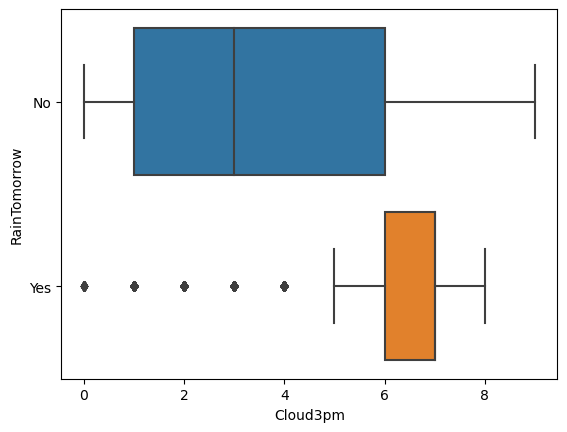

In [117]:
# Relationship between Temp3pm and Rain tomorrow
sns.boxplot(data ,x='Cloud3pm',y='RainTomorrow')


In [118]:
data_numeric_columns = data.select_dtypes(include='number')
data_numeric_columns.head()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6


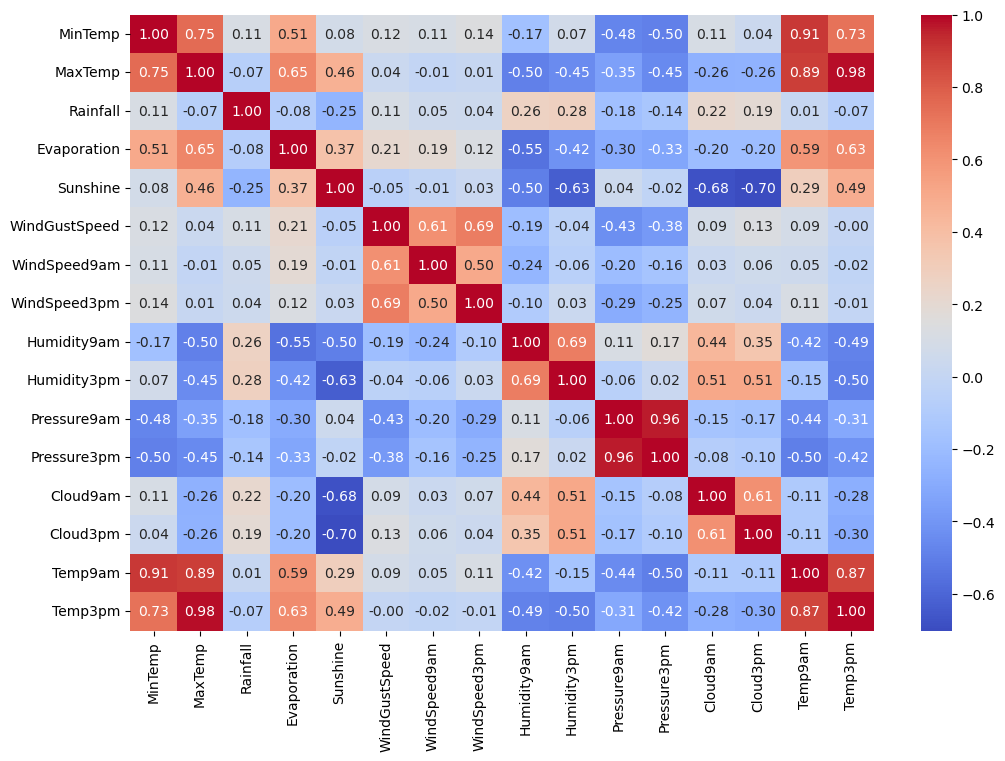

In [119]:
# Step 3: Calculate the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(data_numeric_columns.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.show()

In [120]:
# Selection of categorical data

data_categorical_columns = data.select_dtypes(include=['category', 'object'])
data_categorical_columns.head()


,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Rainfall_group
6049,2009-01-01,Cobar,SSW,ENE,SW,No,No,0-0.6
6050,2009-01-02,Cobar,S,SSE,SSE,No,No,0-0.6
6052,2009-01-04,Cobar,NNE,NNE,NNW,No,No,0-0.6
6053,2009-01-05,Cobar,WNW,WNW,WSW,No,No,0-0.6
6054,2009-01-06,Cobar,WNW,NW,WNW,No,No,0-0.6


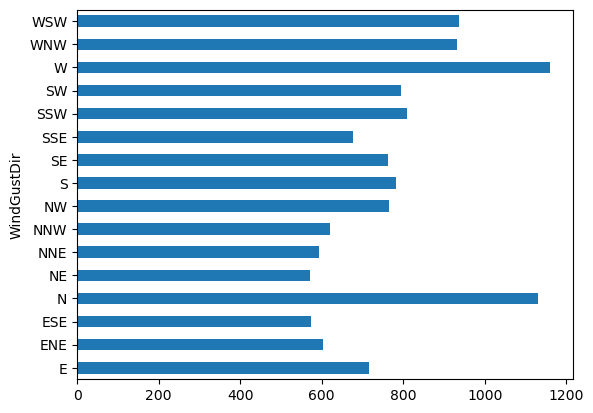

In [121]:
# Lets check if the WindGustDir has any influence on RainTomorrow
data_categorical_columns[ data_categorical_columns['RainTomorrow'] == 'Yes'].groupby(['WindGustDir']).RainTomorrow.count().plot.barh()
plt.show()

#### we clearly see comperatively higher trends in Rain tomorrow for `WindGustDir = W` and `WindGustDir = N`

<Axes: xlabel='RainTomorrow'>

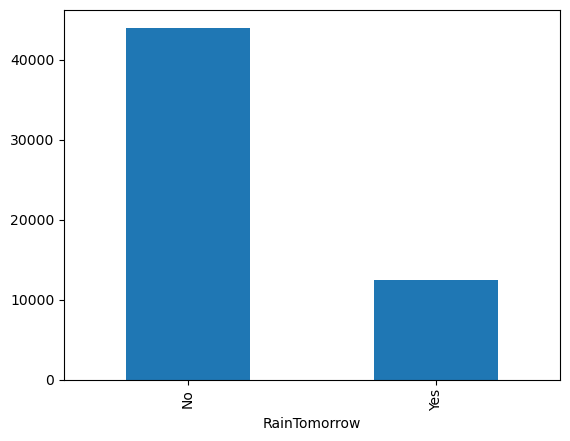

In [122]:
data['RainTomorrow'].value_counts().plot(kind='bar')


### So we see that in general the number of records where RainTomorrow = Yes is much lesser than RainTomorrow = No. Being RainTomorrow as the tgarget varaiable this situation is known as class imbalance.

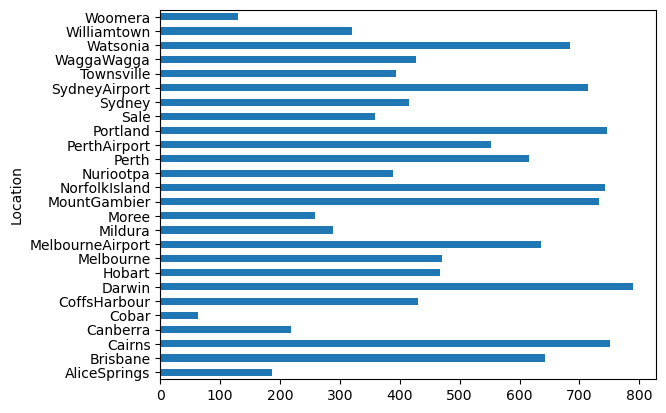

In [123]:
# Lets check if the WindGustDir has any influence on RainTomorrow
data_categorical_columns[ data_categorical_columns['RainTomorrow'] == 'Yes'].groupby(['Location']).RainTomorrow.count().plot.barh()
plt.show()

## Now we will start model building excercise. We will first build the model using RFE. We can build one more model by using K-fold technique.Steps involved
    - import libraries
    - preprocessing (convert boolean to 1,0 and convert categorical data to dummy)
    - Train /Test split
	- Divide X and y for train and test
    - Feature scaling on train data
    - Feature scaling on Test data
    - RFE based feature selection
    - Model building
    - Model evaluation




In [124]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings('ignore')

In [125]:
# Convert Yes / No to 1 /0
data.RainToday = data.RainToday.map({'Yes' :1, 'No' : 0})
data.RainTomorrow = data.RainTomorrow.map({'Yes' :1, 'No' : 0})
data.RainToday.value_counts()

RainToday
0    43958
1    12462
Name: count, dtype: int64

In [126]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_group
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0,0-0.6
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0,0-0.6
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0,0-0.6
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0,0-0.6
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0,0-0.6


In [127]:
# Check Cardinality of the categorical variables
x = data.select_dtypes(include=['category', 'object'])
for i in  x:
    print(f'For columns {i} cardinality is {len(pd.unique(x[i]))}')


For columns Date cardinality is 3416
For columns Location cardinality is 26
For columns WindGustDir cardinality is 16
For columns WindDir9am cardinality is 16
For columns WindDir3pm cardinality is 16
For columns Rainfall_group cardinality is 6


### Considering the cardinality of Location,WindGustDir,WindGustDir ,WindGustDir  we will perform frequency encoding. One hot encoding will add multiple dimensions which is not warrented.

In [128]:
Location = data.Location.value_counts().to_dict()
data['Location_encoded'] =  data.Location.map(Location)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_group,Location_encoded
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0,0-0.6,534
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0,0-0.6,534
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0,0-0.6,534
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0,0-0.6,534
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0,0-0.6,534


In [129]:
WindGustDir = data['WindGustDir'].value_counts().to_dict()
WindGustDir

{'E': 4516,
 'N': 4210,
 'W': 4161,
 'SW': 4052,
 'ENE': 4028,
 'SE': 3930,
 'SSW': 3898,
 'WSW': 3791,
 'S': 3636,
 'ESE': 3312,
 'SSE': 3295,
 'NE': 3185,
 'WNW': 2989,
 'NW': 2612,
 'NNE': 2516,
 'NNW': 2289}

In [130]:
# Similarly handle WindGustDir ,WindGustDir  and WindGustDir 
data['WindGustDir_encoded'] = data.WindGustDir.map(WindGustDir)

WindDir9am  = data['WindDir9am'].value_counts().to_dict()
data['WindDir9am_encoded'] = data.WindGustDir.map(WindDir9am)

WindDir3pm  = data['WindDir3pm'].value_counts().to_dict()
data['WindDir3pm_encoded'] = data.WindGustDir.map(WindDir3pm)


In [131]:
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,RainToday,RainTomorrow,Rainfall_group,Location_encoded,WindGustDir_encoded,WindDir9am_encoded,WindDir3pm_encoded,year,month,day
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,0,0,0-0.6,534,3898,2926,3485,2009,1,1
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,0,0,0-0.6,534,3636,3421,4109,2009,1,2
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,0,0,0-0.6,534,2516,3267,2440,2009,1,4
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,0,0,0-0.6,534,2989,2918,3200,2009,1,5
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,0,0,0-0.6,534,2989,2918,3200,2009,1,6


In [132]:
# Drop Date column
data.drop(columns=['Date','WindGustDir','WindDir9am','WindDir3pm','Location'],axis=1,inplace=True)
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,RainToday,RainTomorrow,Rainfall_group,Location_encoded,WindGustDir_encoded,WindDir9am_encoded,WindDir3pm_encoded,year,month,day
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,0,0,0-0.6,534,3898,2926,3485,2009,1,1
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,...,0,0,0-0.6,534,3636,3421,4109,2009,1,2
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,0,0,0-0.6,534,2516,3267,2440,2009,1,4
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,0,0,0-0.6,534,2989,2918,3200,2009,1,5
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,0,0,0-0.6,534,2989,2918,3200,2009,1,6


In [133]:
# we will drop the day columns as this is not going to add any value
data.drop(columns=['day'],axis=1,inplace=True)

In [134]:
# we will drop the year columns as this is not going to add any value
data.drop(columns=['year'],axis=1,inplace=True)

In [135]:
# Now we will perform one-hot encoding for the month columns
data.month = data.month.astype('category')
month_dummy = pd.get_dummies(data.month,dtype=int,drop_first=True)
data.drop(['month'],axis=1,inplace=True)
data = pd.concat([data,month_dummy],axis=1)
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,3,4,5,6,7,8,9,10,11,12
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,0,0,0,0,0,0,0,0,0,0
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,...,0,0,0,0,0,0,0,0,0,0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,0,0,0,0,0,0,0,0,0,0
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,0,0,0,0,0,0,0,0,0,0
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
# Rename Month columns
data.rename(columns={
                    1 : "Jan" ,
                    2 : "Feb",
                    3: "Mar",
                    4 : "Apr",
                    5 : "May",
                    6 : "Jun",
                    7 : "July",
                    8 : "Aug",
                    9 : "Sep",
                    10 : "Oct",
                    11 : "Nov",
                    12 : "Dec",
                     
                     },inplace=True)

In [137]:
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Mar,Apr,May,Jun,July,Aug,Sep,Oct,Nov,Dec
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,0,0,0,0,0,0,0,0,0,0
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,...,0,0,0,0,0,0,0,0,0,0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,0,0,0,0,0,0,0,0,0,0
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,0,0,0,0,0,0,0,0,0,0
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,0,0,0,0,0,0,0,0,0,0


### Lets perform the Train / Test split



In [138]:
data_train,data_test = train_test_split(data,train_size=.7,random_state=100)


In [139]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39494 entries, 121913 to 100955
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MinTemp              39494 non-null  float64
 1   MaxTemp              39494 non-null  float64
 2   Rainfall             39494 non-null  float64
 3   Evaporation          39494 non-null  float64
 4   Sunshine             39494 non-null  float64
 5   WindGustSpeed        39494 non-null  float64
 6   WindSpeed9am         39494 non-null  float64
 7   WindSpeed3pm         39494 non-null  float64
 8   Humidity9am          39494 non-null  float64
 9   Humidity3pm          39494 non-null  float64
 10  Pressure9am          39494 non-null  float64
 11  Pressure3pm          39494 non-null  float64
 12  Cloud9am             39494 non-null  float64
 13  Cloud3pm             39494 non-null  float64
 14  Temp9am              39494 non-null  float64
 15  Temp3pm              39494 non-null

In [140]:
data_test.shape

(16926, 34)

### Divide X and y for train and test

In [141]:
y_train = data_train.pop('RainTomorrow')
X_train = data_train

y_test = data_test.pop('RainTomorrow')
X_test = data_test



In [142]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39494 entries, 121913 to 100955
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MinTemp              39494 non-null  float64
 1   MaxTemp              39494 non-null  float64
 2   Rainfall             39494 non-null  float64
 3   Evaporation          39494 non-null  float64
 4   Sunshine             39494 non-null  float64
 5   WindGustSpeed        39494 non-null  float64
 6   WindSpeed9am         39494 non-null  float64
 7   WindSpeed3pm         39494 non-null  float64
 8   Humidity9am          39494 non-null  float64
 9   Humidity3pm          39494 non-null  float64
 10  Pressure9am          39494 non-null  float64
 11  Pressure3pm          39494 non-null  float64
 12  Cloud9am             39494 non-null  float64
 13  Cloud3pm             39494 non-null  float64
 14  Temp9am              39494 non-null  float64
 15  Temp3pm              39494 non-null

In [143]:
X_test.shape

(16926, 33)

In [144]:
y_train.shape

(39494,)

In [145]:
type(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 39494 entries, 121913 to 100955
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MinTemp              39494 non-null  float64
 1   MaxTemp              39494 non-null  float64
 2   Rainfall             39494 non-null  float64
 3   Evaporation          39494 non-null  float64
 4   Sunshine             39494 non-null  float64
 5   WindGustSpeed        39494 non-null  float64
 6   WindSpeed9am         39494 non-null  float64
 7   WindSpeed3pm         39494 non-null  float64
 8   Humidity9am          39494 non-null  float64
 9   Humidity3pm          39494 non-null  float64
 10  Pressure9am          39494 non-null  float64
 11  Pressure3pm          39494 non-null  float64
 12  Cloud9am             39494 non-null  float64
 13  Cloud3pm             39494 non-null  float64
 14  Temp9am              39494 non-null  float64
 15  Temp3pm              39494 non-null

NoneType

In [146]:
Num_var = X_train.select_dtypes(include='number')
Num_var.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39494 entries, 121913 to 100955
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MinTemp              39494 non-null  float64
 1   MaxTemp              39494 non-null  float64
 2   Rainfall             39494 non-null  float64
 3   Evaporation          39494 non-null  float64
 4   Sunshine             39494 non-null  float64
 5   WindGustSpeed        39494 non-null  float64
 6   WindSpeed9am         39494 non-null  float64
 7   WindSpeed3pm         39494 non-null  float64
 8   Humidity9am          39494 non-null  float64
 9   Humidity3pm          39494 non-null  float64
 10  Pressure9am          39494 non-null  float64
 11  Pressure3pm          39494 non-null  float64
 12  Cloud9am             39494 non-null  float64
 13  Cloud3pm             39494 non-null  float64
 14  Temp9am              39494 non-null  float64
 15  Temp3pm              39494 non-null

### Feature scaling on train and test data. We use MinMaxScelar

In [147]:
scelar = MinMaxScaler()
# Get the numerical columns
#Num_var =  ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
Num_var =  ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','Location_encoded'
            ,'WindGustDir_encoded','WindDir9am_encoded','WindDir3pm_encoded','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec']
X_train2 = scelar.fit_transform(X_train[Num_var])

# Feature scaling of test data
X_test2 = scelar.transform(X_test[Num_var])

In [148]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39494 entries, 121913 to 100955
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MinTemp              39494 non-null  float64
 1   MaxTemp              39494 non-null  float64
 2   Rainfall             39494 non-null  float64
 3   Evaporation          39494 non-null  float64
 4   Sunshine             39494 non-null  float64
 5   WindGustSpeed        39494 non-null  float64
 6   WindSpeed9am         39494 non-null  float64
 7   WindSpeed3pm         39494 non-null  float64
 8   Humidity9am          39494 non-null  float64
 9   Humidity3pm          39494 non-null  float64
 10  Pressure9am          39494 non-null  float64
 11  Pressure3pm          39494 non-null  float64
 12  Cloud9am             39494 non-null  float64
 13  Cloud3pm             39494 non-null  float64
 14  Temp9am              39494 non-null  float64
 15  Temp3pm              39494 non-null

### Now we will apply RFE to filter initial list of feature variables

In [149]:
# Build a model instance
model = LogisticRegression(random_state=0)
model.fit(X_train2,y_train)


LogisticRegression(random_state=0)

In [150]:
# Build rfe

rfe = RFE(model,n_features_to_select=14)
rfe.fit(X_train2,y_train)



RFE(estimator=LogisticRegression(random_state=0), n_features_to_select=14)

In [151]:
# list rfe outcome
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MinTemp', True, 1),
 ('MaxTemp', True, 1),
 ('Rainfall', True, 1),
 ('Evaporation', True, 1),
 ('Sunshine', True, 1),
 ('WindGustSpeed', True, 1),
 ('WindSpeed9am', True, 1),
 ('WindSpeed3pm', True, 1),
 ('Humidity9am', False, 12),
 ('Humidity3pm', True, 1),
 ('Pressure9am', True, 1),
 ('Pressure3pm', True, 1),
 ('Cloud9am', False, 4),
 ('Cloud3pm', True, 1),
 ('Temp9am', False, 11),
 ('Temp3pm', True, 1),
 ('RainToday', True, 1),
 ('Rainfall_group', False, 17),
 ('Location_encoded', False, 19),
 ('WindGustDir_encoded', False, 18),
 ('WindDir9am_encoded', False, 5),
 ('WindDir3pm_encoded', False, 16),
 ('Feb', False, 13),
 ('Mar', False, 9),
 ('Apr', False, 7),
 ('May', False, 14),
 ('Jun', False, 8),
 ('July', False, 3),
 ('Aug', False, 6),
 ('Sep', False, 2),
 ('Oct', False, 10),
 ('Nov', False, 15)]

#### Based on RFE we will only consider the columns where rfe.support_ = true. And will build another model.

In [152]:
X_train_rfe = X_train[['MinTemp', 'MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity3pm','Pressure3pm','Cloud3pm','Temp3pm','RainToday']]
x_test_rfe = X_test[['MinTemp', 'MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity3pm','Pressure3pm','Cloud3pm','Temp3pm','RainToday']]

rfe_model = LogisticRegression(random_state=0)
rfe_model.fit(X_train_rfe,y_train)

LogisticRegression(random_state=0)

### Model prediction on test data


In [153]:
y_pred_test = rfe_model.predict(x_test_rfe)

In [154]:
from sklearn.metrics import confusion_matrix


con= confusion_matrix(y_test,y_pred_test) # Evaluation of Model Performance & Sensitivity and Specificity Analysis


<Axes: >

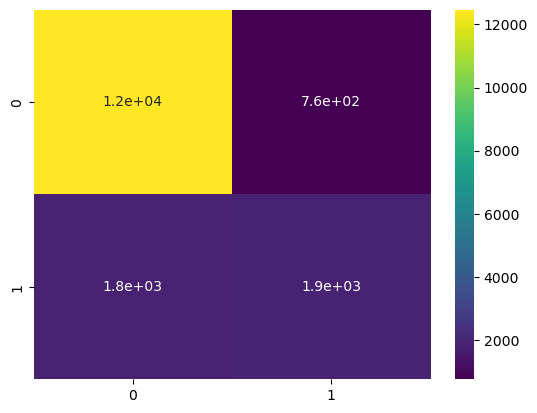

In [155]:
sns.heatmap(con, annot=True, cmap='viridis', cbar=True) # heatmap for Matrix Data Representation

In [156]:

from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test)
rec = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

In [157]:
eval = {'acc' :acc,'Prec' :prec,'rec' : rec, 'f1' :f1,'recordId':1}
df = pd.DataFrame(eval,index=['recordId'])

In [158]:
df

,acc,Prec,rec,f1,recordId
recordId,0.848222,0.713854,0.510805,0.595497,1


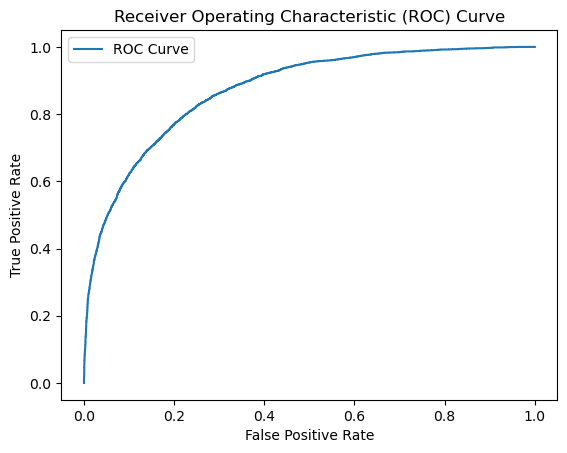

In [159]:
from sklearn.metrics import roc_curve
y_pred_proba = rfe_model.predict_proba(x_test_rfe)
fpr,tpr,thresholds = roc_curve(y_test, y_pred_proba[:,1])

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Now we will use K-fold cross validation for hyper parameter tuning. We will use grid search cross validation for this purpose.

In [160]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


In [161]:
# Step 1 : Create a cross validation scheme

kfold = KFold(n_splits=5,shuffle=True,random_state=100)

In [162]:
# Step 2 : Specify the range of hyper parameters
hyper_params = [{'n_features_to_select' :  list(range(1,33))}]

In [163]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'Rainfall_group', 'Location_encoded',
       'WindGustDir_encoded', 'WindDir9am_encoded', 'WindDir3pm_encoded',
       'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov',
       'Dec'],
      dtype='object')

In [164]:
# Step 3 : perform grid search
# Step 3.1 : Specify model
X_CV_train = X_train.drop(columns=['Rainfall_group'],axis=1)
model = LogisticRegression()
model.fit(X_CV_train,y_train)
rfe = RFE(model)


In [165]:
# Step 3.2 - perform grid search CV
model_cv = GridSearchCV(estimator=rfe,return_train_score=True,verbose=1,param_grid=hyper_params,cv=kfold,n_jobs=-1)
model_cv.fit(X_CV_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LogisticRegression()), n_jobs=-1,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, verbose=1)

In [166]:
model_cv.best_params_

{'n_features_to_select': 20}

In [170]:
X_CV_test = X_test.drop(columns=['Rainfall_group'],axis=1)
y_pred_cv =model_cv.predict(X_CV_test)


In [167]:
cv_results  = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,33.099648,3.459960,0.019828,0.008369,1,{'n_features_to_select': 1},0.775794,0.807444,0.797823,0.787441,...,0.793817,0.011072,32,0.779902,0.801456,0.803861,0.776990,0.803171,0.793076,0.012006
1,32.293797,2.624767,0.023169,0.007855,2,{'n_features_to_select': 2},0.801241,0.801874,0.799721,0.809343,...,0.802704,0.003396,31,0.806583,0.800728,0.802026,0.804558,0.800893,0.802957,0.002272
2,34.060242,2.590197,0.018660,0.003961,3,{'n_features_to_select': 3},0.812255,0.803140,0.800608,0.818585,...,0.811997,0.009287,29,0.816015,0.801393,0.802279,0.814781,0.821623,0.811218,0.008005
3,29.836869,1.502107,0.020247,0.006686,4,{'n_features_to_select': 4},0.812635,0.803899,0.801620,0.819218,...,0.808021,0.006820,30,0.816933,0.801804,0.802754,0.815794,0.801905,0.807838,0.006978
4,32.259863,3.018391,0.023298,0.005662,5,{'n_features_to_select': 5},0.812761,0.836688,0.828712,0.820104,...,0.826809,0.009209,28,0.817756,0.831587,0.834626,0.815952,0.832321,0.826448,0.007918
5,31.334673,1.824339,0.020957,0.005661,6,{'n_features_to_select': 6},0.830865,0.849728,0.849221,0.841499,...,0.844761,0.007850,27,0.840608,0.849375,0.849660,0.837696,0.849000,0.845268,0.005082
6,31.523871,3.242905,0.022943,0.008735,7,{'n_features_to_select': 7},0.849348,0.847449,0.847196,0.851374,...,0.849420,0.001898,23,0.850483,0.849185,0.849185,0.850926,0.848019,0.849559,0.001037
7,31.130877,2.414374,0.015627,0.006768,8,{'n_features_to_select': 8},0.845803,0.847955,0.847702,0.850867,...,0.849066,0.002548,24,0.850451,0.850103,0.850166,0.849818,0.848493,0.849806,0.000687
8,27.546454,1.813529,0.026450,0.011729,9,{'n_features_to_select': 9},0.846943,0.851247,0.848968,0.850361,...,0.850180,0.002162,21,0.850768,0.850641,0.851242,0.850198,0.849190,0.850408,0.000694
9,28.735163,3.146194,0.022282,0.007735,10,{'n_features_to_select': 10},0.847196,0.852133,0.851247,0.849095,...,0.851370,0.003375,13,0.850673,0.851021,0.852287,0.851337,0.850962,0.851256,0.000557


In [171]:
from sklearn.metrics import classification_report


print("classification_report is ",classification_report(y_test ,y_pred_cv)) 

classification_report is                precision    recall  f1-score   support

           0       0.87      0.94      0.91     13224
           1       0.72      0.51      0.59      3702

    accuracy                           0.85     16926
   macro avg       0.79      0.73      0.75     16926
weighted avg       0.84      0.85      0.84     16926



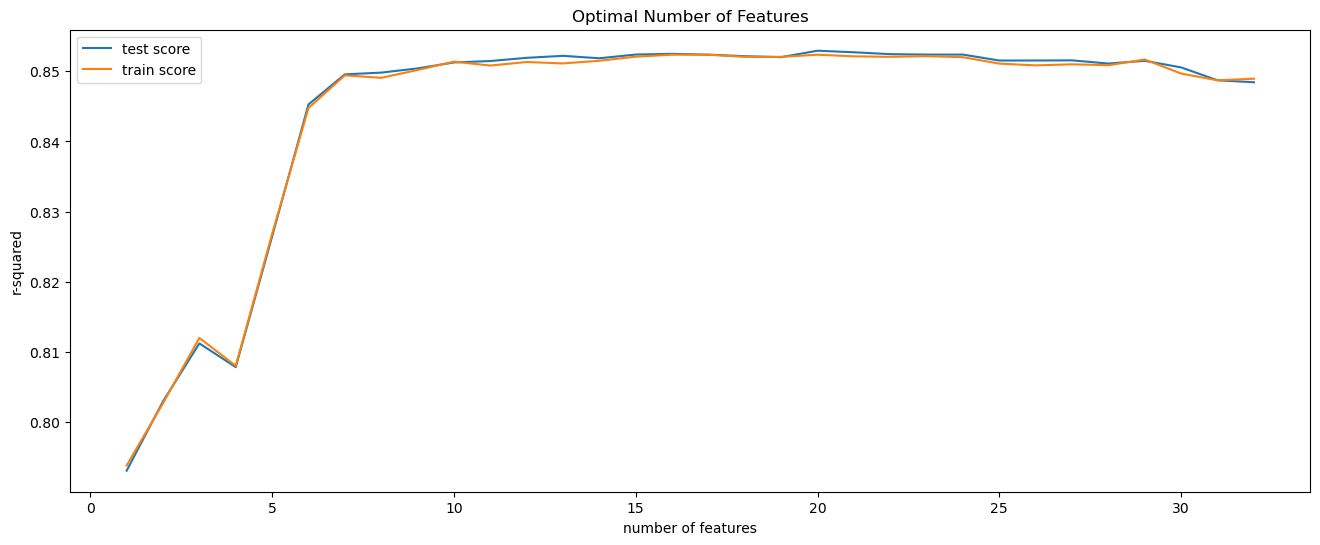

In [172]:
# plotting cv results

plt.figure(figsize=(16,6))
plt.plot(cv_results['param_n_features_to_select'] , cv_results['mean_train_score'])
plt.plot(cv_results['param_n_features_to_select'] , cv_results['mean_test_score'])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()